In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Visualizing and Understanding Convolutional Networks

> CNN을 제대로 이해하기 위한 논문 <br>
> CNN을 시각화 하여 왜 성능이 향상되었는지를 탐구하는 논문 <br>
> 과거의 관점으로 AlexNet에 대한 '통찰'과 '진단'을 제공한다  

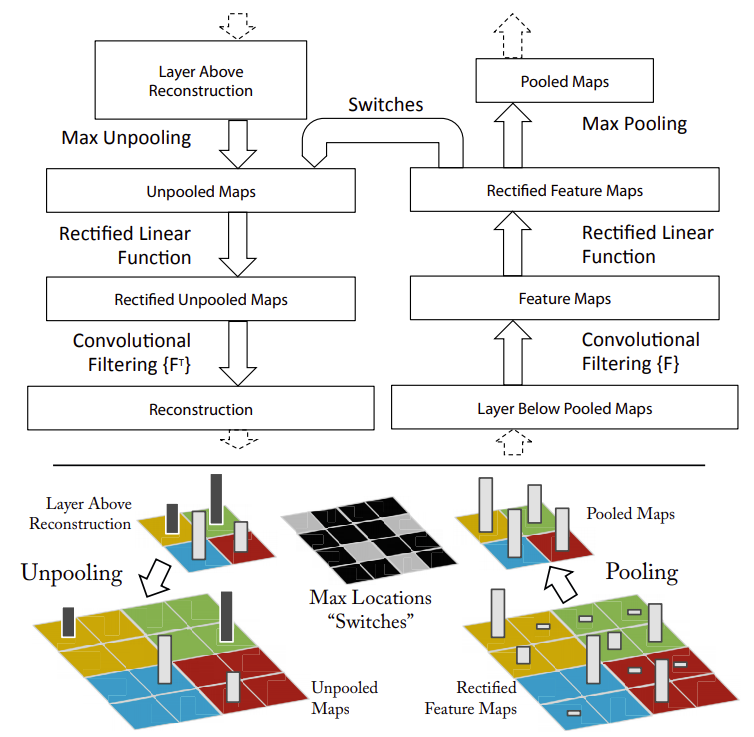

```
Convolutional layer를 통과하고나서 Max pooling을 거칠때 가장 영향력 있는 값들로 축약되기 때문에 큰 특징만 남게 된다 
따라서 반대로 pooling을 거치기 전으로 복원시킨다면 큰 특징만 남아 있기 때문에 Detail한 특징들은 사라지게 될 것이다   
```

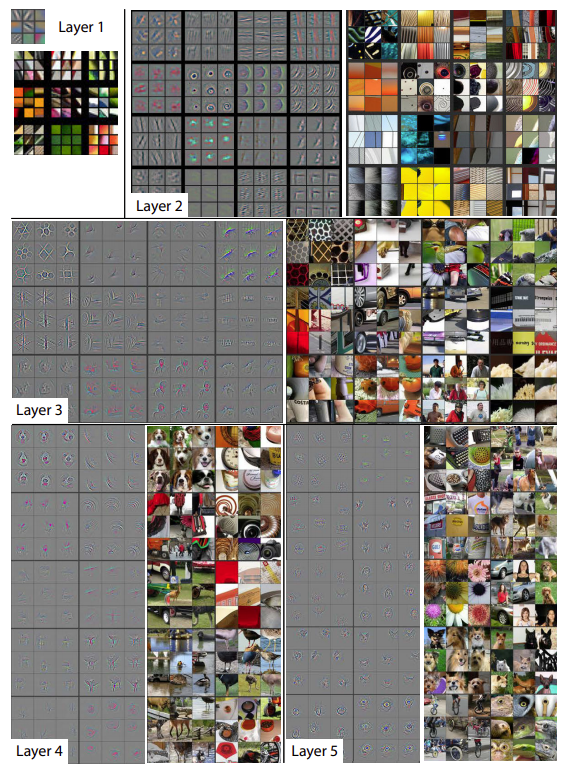

```python
AlexNet의 네트워크 구조대로 통과시킨 데이터들을 각 레이어 별로 복원시키게 되면 
가장 중요한 특징들만 남도록 복원된다는 것을 시각적으로 확인 할 수 있다 

시각화된 결과를 보면 AlexNet의 구조는 처음 레이어에서 간단한 특징들을 뽑아내다가 
레이어가 깊어지면 깊어질 수록 '복잡한 특징'을 구분할 수 있도록 학습이 되는 것을 알 수 있다
```

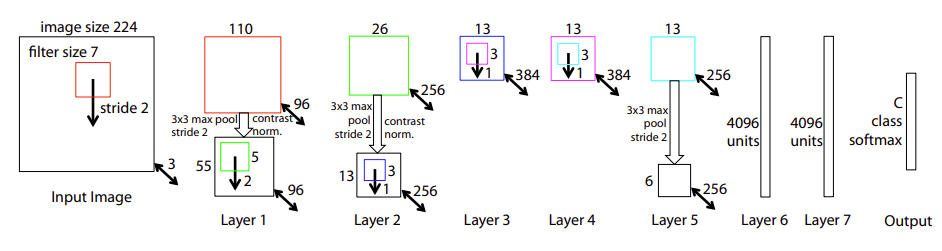

```
기존 AlexNet의 첫번째 Layer에서 filter 11x11, stride 4를 filter 7x7, stride 2로 바꾸었다  
두번째 layer에서는 stride 1, zero-padding 2에서  stride 2로 바꾸었다  
=> 기존에는 filter가 컸기 때문에 작은 것들의 특징을 잘 못잡는다는 문제가 있었다 

결과 => 파라미터가 줄어들었고, 좀 더 디테일한 특징을 알아낼 수 있도록 학습하게되었다 
receptive field를 대신할 수 있다 @@@ 의미 확인
```

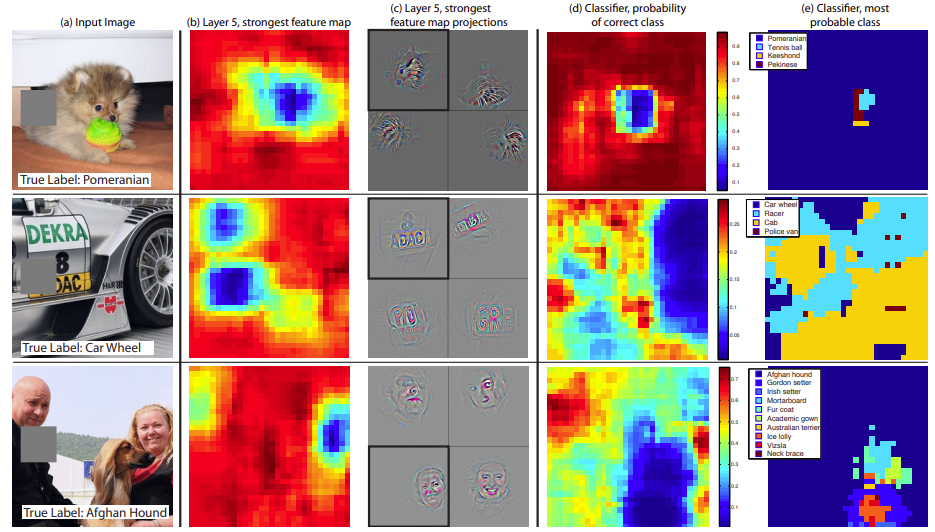

```
일부분을 가림으로써 어떤 부분이 가장 영향력이 있는지를 확률적으로 계산하였다 (abliation study)
특정 부분을 가렸을 때 가장 성능이 안좋다면 그 부분은 가장 영향력이 있는 부분인 것이다 (파란색 부분이 가장 영향력 있는 부분)

```

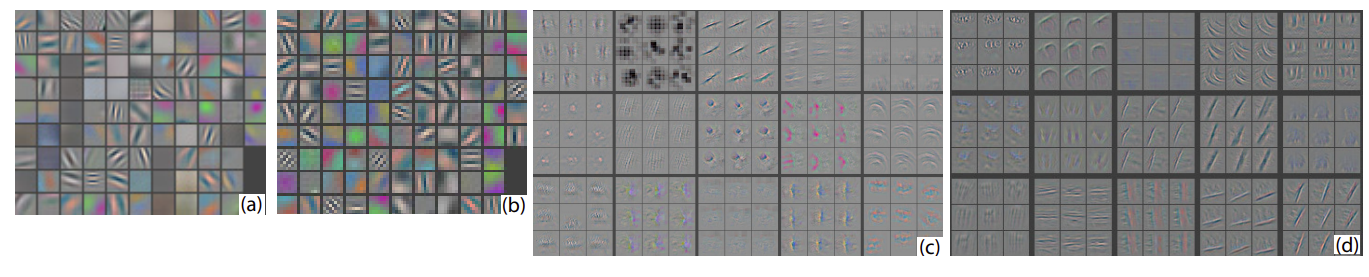

```
a와 c는 AlexNet b와 d는 ZFNet

Layer 1 
a 그림에서는 dead feature가 꽤 있고 좀 더 흐릿하게 구분된 반면 
c 그림에서는 dead feature가 굉장히 많이 줄고 특징이 좀 더 선명하게 구분되었다 
filter사이즈와 stride를 줄임으로써 좀 더 특징을 잘 구분할 수 있게 학습이되었다고 할 수 있다 

Layer 2
c 그림에서 보면 빈 공간이 많고 aliasing(계단현상)이 발견된 반면 
d 그림에서는 빈 공간이 적고 특징이 더 선명하게 잘 구분되도록 학습이 되었다  
```

## Network In Network

> 네트워크 안에 네트워크를 넣는 방식 <br>
> convolution layer사이에 mlp가 있다 (사실상 1x1 convolution을 사용한 것)

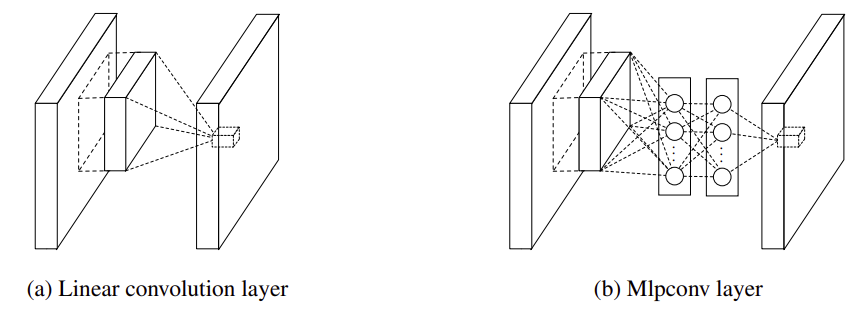

## Flatten의 문제

In [1]:
import tensorflow as tf 

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
X_train = X_train.reshape(-1,28,28,1)/255

In [9]:
# AlexNet
 
input_ = tf.keras.Input((224,224,3))
x = tf.keras.layers.Conv2D(96,11,4)(input_)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same')(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(384,3)(x) 
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(384,3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256, 3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Flatten()(x) # 일렬로 만들어 지기 때문에 위치 정보를 잃고 학습할 weight가 많이 생긴다 (FC만 썼을때 위치정보를 잃는다)
x = tf.keras.layers.Dense(4096)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4096, kernel_initializer=tf.keras.initializers.Constant(1))(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='softmax')(x)

In [10]:
model = tf.keras.models.Model(input_,x) 

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
re_lu_6 (ReLU)               (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 54, 54, 256)       614656    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 54, 54, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 384)       8851

In [25]:
# AlexNet Flatten x / Global average pooling 
 
input_ = tf.keras.Input((224,224,3))
x = tf.keras.layers.Conv2D(96,11,4)(input_)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same')(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(384,3)(x) 
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(384,3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256, 3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(1000, 3)(x) # 1x1 convolution 
x = tf.keras.layers.GlobalAveragePooling2D()(x) # 1차원으로  바뀌었기 때문에 Flatten과 똑같다. 하지만 Flatten보다 Parameter를 훨씬 줄일 수 있다 
x = tf.keras.layers.Dense(1000)(x)

In [26]:
model = tf.keras.models.Model(input_,x) 

In [27]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
re_lu_42 (ReLU)              (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 54, 54, 256)       614656    
_________________________________________________________________
re_lu_43 (ReLU)              (None, 54, 54, 256)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 384)       8851

## Flatten vs Global Average Pooling

```
Flatten은 원본 데이터 그대로 1차원으로 변화 시키지만 GAP은 최종결과에서 평균을 내어 하나의 값으로 바꾸고 그 형태가 1차원으로 변화된다 
GAP는 전체 값 중에서 noise나 outlier등 학습이 안된 것들을 뭉뚱그리기 때문에 오히려 성능이 향상 되는 경우가 있다 

GAP는 전체를 반영하기 때문에 Flatten한 것 보다 값을 더 잘 반영 하는 경우가 있지만 
weight가 줄어들기 때문에 하나의 관점보다 여러개의 관점으로 파악하는 경우가 성능이 좋은 경우가 있을 수 있다 
따라서 경우에 따라서 결정해야 할 문제이다 
Hyperparameter처럼 데이터에 따라서 직접 정해줘야 한다 
```

## Grouped Convolution

```
Grouped Convolution은 입력 값의 채널들을 여러 개의 그룹으로 나누어 독립적으로 Convolution 연산을 수행하는 방식이다. 
모델이 복잡할때 parameter를 줄이기 위해서 사용하는 경우가 있다 
```

## 1x1 Convolution

> Point-wise Convolution

```python
1. 1x1의 depth에 따라서 차원이 바뀐다
2. Non-linear 특징을 부여한다  
3. Fully connected 처럼 사용한다 
```

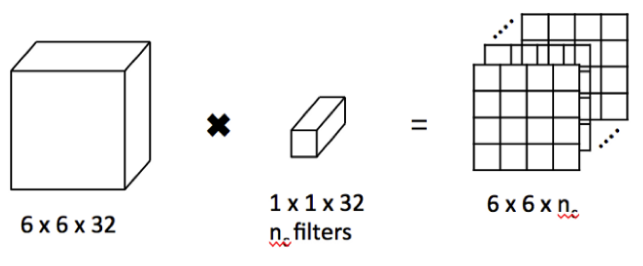

## GoogLeNet

```python
1. Network in Network (1x1 convolution) 
2. Stacking 
3. Global average pooling

GoogLeNet은 위 3가지 내용을 참고하여 만들어졌다 
```